# Reading and displaying Images

Text(0.5, 1.0, 'Flower')

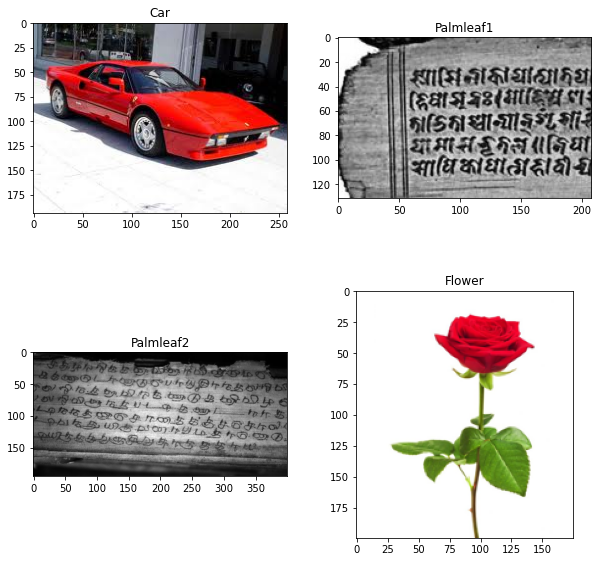

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

car = imread('car.png')
flower = imread('flower.png')
palmleaf1 = imread('palmleaf1.png')
palmleaf2 = imread('palmleaf2.png')

plt.subplots(2,2,figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(car)
plt.title('Car')

plt.subplot(2,2,2)
plt.imshow(palmleaf1,'gray')
plt.title('Palmleaf1')

plt.subplot(2,2,3)
plt.imshow(palmleaf2,'gray')
plt.title('Palmleaf2')

plt.subplot(2,2,4)
plt.imshow(flower)
plt.title('Flower')


# Otsu Thresholding
Let an image has $L$ possible intensity levels then threshold $t$ to segment the image into two parts will be between 0 and L-1
$$
0\leq t\leq L-1
$$

Let $F_{i}$ represent the number of times intensity $i$ occurs in the image.
Dividing the image into two classes: define class 1 ($C_{1}$) as the set of pixels satisfying $\{i : 0\leq i \leq t\}$ and class 2 ($C_{2}$) as the set of pixels satisfying $\{i : t< i \leq L-1\}$. Let the number of pixels in $C_{1}$ and $C_{2}$ be $N_{1}$ and $N_{2}$ respectively. The means and variances of class $j$, $\mu_{j}$ and $\sigma_{j}^{2}$, are defined as

$$
\mu_{j} = \frac{\Sigma_{i\in C_{j}}iF_{i}}{N_{j}}
$$

$$
\sigma^{2}_{j} = \frac{\Sigma_{i \in C_{j}}(i-\mu_{j})^{2}F_{i}}{N_{j}}
$$

Also, the means and variances of the entire image, $\mu_{G}$ and $\sigma^{2}_{G}$, are defined as

$$
\mu_{G} = \frac{\Sigma_{i=0}^{L-1}iF_{i}}{N}
$$

$$
\sigma^{2}_{G} = \frac{\Sigma_{i=0}^{L-1}(i-\mu_{G})^{2}F_{i}}{N}
$$

$N$ is the total number of pixels in the image.

The within class variance, $\sigma^{2}_{w}$, is defined as

$$
\sigma^{2}_{w} = \frac{\Sigma_{j=1}^{2}\sigma_{j}^{2}N_{j}}{N}
$$

The between class variance, $\sigma_{b}^{2}$ is defined as 

$$
\sigma^{2}_{b} = \frac{\Sigma_{j=1}^{2}(\mu_{j}-\mu_{G})^{2}N_{j}}{N}
$$

It is clear that the terms defined above are functions of $t$. $t$ has been skipped for notational brevity. It can be shown that the between class variance can be rewritten as 

$$
\sigma^{2}_{b} = \frac{(\mu_{G}P_{1}-m)^{2}}{P_{1}(1-P_{1})}
$$

$P_{1}$ and $m$ are given as

$$
P_{1} = \frac{N_{1}}{N}
$$

$$
m = \frac{\Sigma_{i\in C_{1}}iF_{i}}{N} = \frac{\mu_{1}N_{1}}{N}
$$

The optimal threshold $t^{*}$ from Otsu's method is given by

$$
t^{*} = argmax_{0\leq t \leq L-1} \sigma^{2}_{b}(t) = argmin_{0\leq t \leq L-1} \sigma^{2}_{w}(t)
$$


In [2]:
def otsu_binary_thresholding(image):
    image = image.astype(float)  #converting the image to float
    thresholds = np.unique(image)     #get the sorted set of intensity values in the image 
    n_intensity_vals = len(thresholds) #total number of intensity values
    threshold = thresholds[0] #setting initial threshold
    optimal_threshold = threshold
    N = np.size(image)
    # if there is only 1 value, no thresholding is possible
    # if there are 2 intensity values, the threshold must lie in the middle of them
    if n_intensity_vals == 1:
        return 0
    elif n_intensity_vals == 2:
        return np.mean(thresholds)
    else:
        mu_t=np.mean(image)
        best_between_class_variance=0
        for i in range(1,n_intensity_vals-1):
            threshold=thresholds[i]
            class1=image[image<=optimal_threshold]
            class2=image[image>optimal_threshold]
            mu1=np.mean(class1)
            N1=np.size(class1)
            mu2=np.mean(class2)
            N2=np.size(class2)
            between_class_variance=(((mu1-mu_t)**2)*(N1/N))+(((mu2-mu_t)**2)*(N2/N))
            if between_class_variance>best_between_class_variance:
                best_between_class_variance=between_class_variance
                optimal_threshold=threshold
    return optimal_threshold

# Binarizing using Otsu method

In [3]:
def binarized_image(image):
    final_image = np.zeros(np.shape(image), dtype=float)
    threshold = otsu_binary_thresholding(image)
    final_image[image >= threshold] = 1
    return final_image

In [4]:
t1 = otsu_binary_thresholding(palmleaf1)
t2 = otsu_binary_thresholding(palmleaf2)
print(f"The threshold obtained for 'palmleaf1' is : {t1}")
print(f"The threshold obtained for 'palmleaf2' is : {t2}")

The threshold obtained for 'palmleaf1' is : 105.0
The threshold obtained for 'palmleaf2' is : 51.0


Text(0.5, 1.0, 'Binarized palmleaf1 using Otsu thresholding')

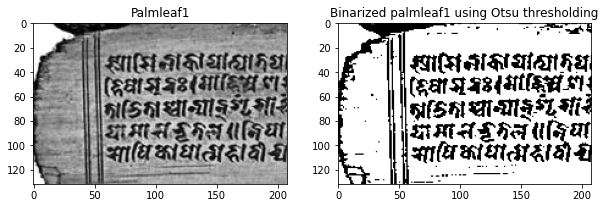

In [5]:
binarized_palmleaf1=binarized_image(palmleaf1)
plt.subplots(1,2,figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(palmleaf1,'gray')
plt.title('Palmleaf1')

plt.subplot(1,2,2)
plt.imshow(binarized_palmleaf1,'gray')
plt.title('Binarized palmleaf1 using Otsu thresholding')

Text(0.5, 1.0, 'Binarized palmleaf2 using Otsu thresholding')

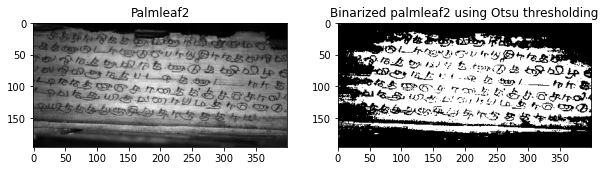

In [6]:
binarized_palmleaf2=binarized_image(palmleaf2)
plt.subplots(1,2,figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(palmleaf2,'gray')
plt.title('Palmleaf2')

plt.subplot(1,2,2)
plt.imshow(binarized_palmleaf2,'gray')
plt.title('Binarized palmleaf2 using Otsu thresholding')

***Observation:*** For palmleaf1 the otsu thresholding algorithm performed well whereas for palmleaf2 it did not because as we can see the palmleaf2 image doesnt have a constant illumination then in such cases global thresholding will not work we should go for local thresholding

# K-Means Clustering

***Flattening the image:***
Flattens an image to be of the shape $(x\times y, z)$, where $(x, y)$ are the dimensions of the image. $z$ is $3$ for RGB images and $1$ for grayscale images. 

In [7]:
def flatten_image(image, rgb=True):
    if rgb:
        x, y, _ = np.shape(image)
        flattened_image = np.zeros((x*y, 3))
        for i in range(3):
            flattened_image[:, i] = np.ravel(image[:, :, i])
    else:
        flattened_image = np.ravel(image)
        flattened_image = flattened_image.reshape(-1, 1)
    return flattened_image

***The K-means algorithm is performed as follows:***
1. First we will obtain the k initial pattern centres and divide the dataset into k clusters by assigning each data sample to the nearest pattern centre. 
2. We will then find the sum square error for all the samples 
3. We will recompute the pattern centres to be the centroids of the current clusters.
4. using the current set of pattern centres, we will recompute the data partition by reassigning each data sample to the nearest pattern centre. If the assignment/labelling remains unchanged then go to step 5 else go to step 2.
5. Return the current set of k-pattern centres.

In [8]:
def k_means_classifier(data, centroids=None, k_means=3, max_iter=5, n_inits=30,
                       low=0, high=255, tolerance=1e-12, flattened=False, rgb=True,
                       return_centroids=False, seed=None):
    if seed is not None:
        np.random.seed(seed)
    if not flattened:
        data = flatten_image(data, rgb=rgb)
    n_samples, n_features = np.shape(data)
    # randomly initializing labels
    labels = np.random.randint(low=0, high=k_means, size=n_samples)
    distances = np.zeros((k_means, n_samples))
    # for the case when initial points is provided
    if centroids is not None:
        for i in range(max_iter):
            for k in range(k_means):
                c = centroids[k]
                distances[k] = np.sum((data - c)**2, axis=1) #distance of each point from the centroid
            new_labels = np.argmin(distances, axis=0) #finding the new labels based on the distances
        
            if (np.mean(np.abs(labels-new_labels)) <= tolerance):
                # if labels remained unchanged
                labels = new_labels
                break
            else:
                # else update labels
                labels = new_labels
                for c in range(k_means):
                    # update centroids
                    centroids[c] = np.mean(data[labels == c], axis=0)
    # for the case when initial points are not provided
    else:
        best_cost = np.inf
        centroids = np.zeros((k_means, n_features))
        best_labels = labels.copy()
        for n in range(n_inits):
            # for each run of k-means, randomly initiate centers
            init = np.random.uniform(low, high, size=(k_means, n_features))
            for i in range(max_iter):
                for k in range(k_means):
                    c = init[k]
                    distances[k] = np.sum((data - c)**2, axis=1)
                new_labels = np.argmin(distances, axis=0)
                if (np.min(np.abs(labels-new_labels)) <= tolerance):
                    labels = new_labels
                    break
                else:
                    labels = new_labels
                    avaliable_labels = set(labels)
                    for c in range(k_means):
                        # if a cluster has points, update the corresponding centroid
                        if c in avaliable_labels:
                            init[c] = np.mean(data[labels == c], axis=0)
                        # if there is a cluster with no points, randomly initiate the 
                        # corresponding center again. We could also choose to totally 
                        # ignore this and work with k_means-1 means but we are already 
                        # working with only 3 means and this would lead to pretty bad results
                        else:
                            init[c] = np.random.uniform(low, high, n_features)
            # get the cost as the sum of the minimum distance of each point from some cluster center
            cost = np.sum(np.min(distances), axis=0)
            # update the cost, centroids and labels when you get a lower cost
            if cost < best_cost:
                best_cost = cost
                centroids = init
                best_labels = labels
        labels = best_labels
    if not return_centroids:
        return labels
    else:
        return labels, centroids

In [9]:
def segment_rgb_image(image, centroids_=None, k_means=3, max_iter=5, n_inits=30, low=0,
                      high=255, tolerance=1e-12, flattened=False, set_centroids=False, seed=None):
    x, y, _ = np.shape(image)
    flattened_image = flatten_image(image, rgb=True)
    final_image = np.zeros_like(flattened_image)
    labels, centroids = k_means_classifier(data=image, centroids=centroids_, k_means=k_means, 
                                           max_iter=max_iter, n_inits=n_inits, low=low, high=high,
                                           tolerance=tolerance, flattened=flattened, rgb=True, 
                                           return_centroids=True, seed=seed)
    # get the labels present
    all_labels = set(labels)
    for label in all_labels:
        if not set_centroids:
            # in this case, to all pixels with label k, assign their average color
            final_image[labels == label] = np.mean(
                flattened_image[labels == label], axis=0)
        else:
            # in this case, to all pixels with label k, assign the kth centroid. The 
            # previous one often gives better results
            final_image[labels == label] = centroids[label]
    final_image = final_image/high
    return final_image.reshape(x, y, 3)

# Plotting Segmented Images

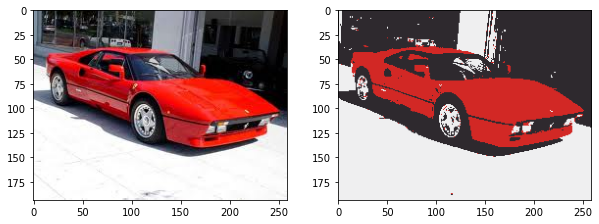

In [10]:
centroids_initial=np.zeros((3,3))
centroids_initial[0, 0] = 255
centroids_initial[2] = 255

plt.subplots(1,2,figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(car)

plt.subplot(1,2,2)
car_segment=segment_rgb_image(car, centroids_=centroids_initial, max_iter=5)
plt.imshow(car_segment)

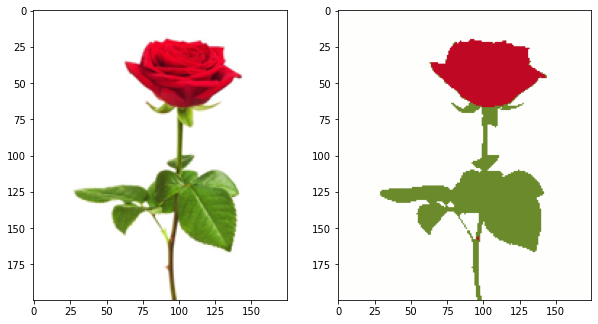

In [11]:
plt.subplots(1,2,figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(flower)

plt.subplot(1,2,2)
flower_segment=segment_rgb_image(flower, centroids_=centroids_initial, max_iter=5)
plt.imshow(flower_segment)

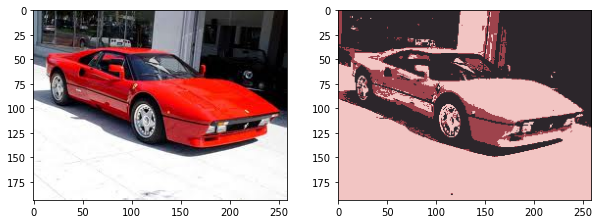

In [12]:
car_segment_rand=segment_rgb_image(car, max_iter=5, seed=7634567)

plt.subplots(1,2,figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(car)

plt.subplot(1,2,2)
plt.imshow(car_segment_rand)


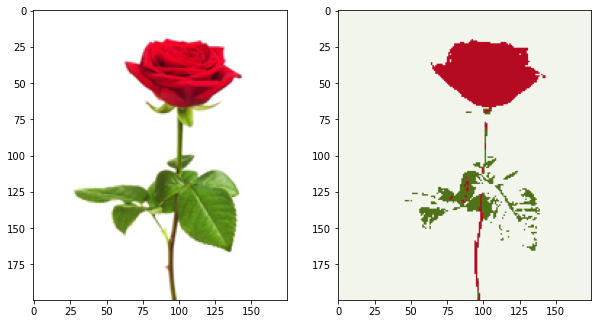

In [13]:
flower_segment_rand=segment_rgb_image(flower, max_iter=5, seed=645300)

plt.subplots(1,2,figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(flower)

plt.subplot(1,2,2)
plt.imshow(flower_segment_rand)